In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import value_counts, decorate

## Data

Monitoring the Future: A Continuing Study of American Youth (8th- and 10th-Grade Surveys)

https://www.icpsr.umich.edu/web/NAHDAP/studies/38883#

In [3]:
from glob import glob

filenames = glob('data/ICPSR*.zip')
filenames

['data/ICPSR_02475-V1.zip',
 'data/ICPSR_35166-V2.zip',
 'data/ICPSR_37183-V1.zip',
 'data/ICPSR_38502-V1.zip',
 'data/ICPSR_20180-V2.zip',
 'data/ICPSR_37415-V1.zip',
 'data/ICPSR_34574-V2.zip',
 'data/ICPSR_02523-V1.zip',
 'data/ICPSR_02390-V1.zip',
 'data/ICPSR_02752-V2.zip',
 'data/ICPSR_03752-V2.zip',
 'data/ICPSR_38189-V1.zip',
 'data/ICPSR_33902-V1.zip',
 'data/ICPSR_02350-V2.zip',
 'data/ICPSR_04537-V2.zip',
 'data/ICPSR_22500-V1.zip',
 'data/ICPSR_30984-V1.zip',
 'data/ICPSR_36149-V1.zip',
 'data/ICPSR_38883-V1.zip',
 'data/ICPSR_36407-V1.zip',
 'data/ICPSR_02940-V1.zip',
 'data/ICPSR_04263-V2.zip',
 'data/ICPSR_04018-V2.zip',
 'data/ICPSR_03426-V1.zip',
 'data/ICPSR_02521-V2.zip',
 'data/ICPSR_02522-V2.zip',
 'data/ICPSR_25422-V2.zip',
 'data/ICPSR_36799-V1.zip',
 'data/ICPSR_02476-V1.zip',
 'data/ICPSR_37842-V1.zip',
 'data/ICPSR_28402-V1.zip',
 'data/ICPSR_39171-V1.zip',
 'data/ICPSR_03183-V1.zip']

In [4]:
import zipfile


def read_dta_from_zip(zip_filename, index=0):
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        # Get the list of files and find the first .dta file
        file_list = zip_ref.namelist()
        dta_files = [f for f in file_list if f.lower().endswith('.dta')]

        if len(dta_files) == 0:
            raise FileNotFoundError("No .dta file found in the ZIP archive.")

        # Read the .dta file into a DataFrame
        stata_path = dta_files[index]
        with zip_ref.open(stata_path) as dta_file:
            df = pd.read_stata(dta_file, convert_categoricals=False)

    return df

In [5]:
import zipfile
import pandas as pd
from functools import reduce

def read_all_dta_from_zip(zip_filename):
    dfs = []
    
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        dta_files = [f for f in zip_ref.namelist() if f.lower().endswith('.dta')]

        if not dta_files:
            raise FileNotFoundError("No .dta files found in the ZIP archive.")

        for path in dta_files:
            with zip_ref.open(path) as dta_file:
                df = pd.read_stata(dta_file, convert_categoricals=False)
                dfs.append(df)
                
    return dfs

    # Merge all dataframes on 'CASEID'
    merged_df = reduce(lambda left, right: pd.merge(left, right, on="CASEID", how="outer"), 
                       dfs)
    return merged_df


In [6]:
def get_year_to_filename(filenames, index=0):
    year_to_filename = {}

    for zip_filename in filenames:
        print(zip_filename)
        df = read_dta_from_zip(zip_filename, index=index)

        years = df['V1'].value_counts()
        if len(years) != 1:
            raise ValueError(f"Unexpected number of unique years in V1 for {zip_filename}: {len(years)}")

        year = int(years.index[0])
        if year < 1900:
            year += 1900
        print(year)
        year_to_filename[year] = zip_filename

    return year_to_filename


In [7]:
ZIPFILE = {
    1991: 'data/ICPSR_02521-V2.zip',
    1992: 'data/ICPSR_02522-V2.zip',
    1993: 'data/ICPSR_02523-V1.zip',
    1994: 'data/ICPSR_02475-V1.zip',
    1995: 'data/ICPSR_02390-V1.zip',
    1996: 'data/ICPSR_02350-V2.zip',
    1997: 'data/ICPSR_02476-V1.zip',
    1998: 'data/ICPSR_02752-V2.zip',
    1999: 'data/ICPSR_02940-V1.zip',
    2000: 'data/ICPSR_03183-V1.zip',
    2001: 'data/ICPSR_03426-V1.zip',
    2002: 'data/ICPSR_03752-V2.zip',
    2003: 'data/ICPSR_04018-V2.zip',
    2004: 'data/ICPSR_04263-V2.zip',
    2005: 'data/ICPSR_04537-V2.zip',
    2006: 'data/ICPSR_20180-V2.zip',
    2007: 'data/ICPSR_22500-V1.zip',
    2008: 'data/ICPSR_25422-V2.zip',
    2009: 'data/ICPSR_28402-V1.zip',
    2010: 'data/ICPSR_30984-V1.zip',
    2011: 'data/ICPSR_33902-V1.zip',
    2012: 'data/ICPSR_34574-V2.zip',
    2013: 'data/ICPSR_35166-V2.zip',
    2014: 'data/ICPSR_36149-V1.zip',
    2015: 'data/ICPSR_36407-V1.zip',
    2016: 'data/ICPSR_36799-V1.zip',
    2017: 'data/ICPSR_37183-V1.zip',
    2018: 'data/ICPSR_37415-V1.zip',
    2019: 'data/ICPSR_37842-V1.zip',
    2020: 'data/ICPSR_38189-V1.zip',
    2021: 'data/ICPSR_38502-V1.zip',
    2022: 'data/ICPSR_38883-V1.zip',
    2023: 'data/ICPSR_39171-V1.zip'
}

In [155]:
year = 2004
zip_filename = ZIPFILE[year]
zip_filename

'data/ICPSR_04263-V2.zip'

In [156]:
from collections import defaultdict

import bisect

class YearLookupDict:
    def __init__(self, year_value_pairs, default=None):
        # Sort by year
        self._years, self._values = zip(*sorted(year_value_pairs.items()))
        self._default = default

    def __getitem__(self, year):
        i = bisect.bisect_right(self._years, year) - 1
        if i < 0:
            if self._default is not None:
                return self._default
            raise KeyError(f"No entry for year {year} and no default set.")
        return self._values[i]

    def __contains__(self, year):
        return year in self._years

    def items(self):
        return zip(self._years, self._values)

    def get(self, year, default=None):
        try:
            return self[year]
        except KeyError:
            return default

In [187]:
INDICES = {
    1991: [[0], [2]],
    1992: [[0, 1], [2, 3]],
    1997: [[0, 1], [4, 5]],
    2012: [[0]]
}
INDICES = YearLookupDict(INDICES)

In [188]:
def read_forms(zip_filename, indices):
    dfs = [read_dta_from_zip(zip_filename, index=index) for index in indices]
    suffixes = [None, '_y']
    df = reduce(lambda left, right: 
                pd.merge(left, right, on="CASEID", how="outer", suffixes=suffixes), 
                dfs)
    return df

In [189]:
INDICES[year]

[[0, 1], [4, 5]]

In [190]:
dfs = [read_forms(zip_filename, indices) for indices in INDICES[year]]
df = pd.concat(dfs, ignore_index=True).copy()

In [191]:
df.head()

,CASEID,V1,V3,V4,V5,V507,V508,V509,V1101,V1102,...,V2385,V2388,V2389,V2390,V2391,V2392,V2393,V2394,V1232,V2236
0,1,2004.0,1.0,10001.0,0.4114,2.0,1.0,1.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,NaN,NaN
1,2,2004.0,1.0,10002.0,0.5304,1.0,1.0,1.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,NaN,NaN
2,3,2004.0,1.0,10003.0,0.4097,3.0,0.0,0.0,-9.0,-9.0,...,1.0,5.0,6.0,6.0,6.0,6.0,6.0,1.0,NaN,NaN
3,4,2004.0,1.0,10004.0,0.6398,3.0,0.0,0.0,-9.0,-9.0,...,1.0,6.0,6.0,6.0,4.0,6.0,1.0,1.0,NaN,NaN
4,5,2004.0,1.0,10005.0,0.9258,3.0,0.0,1.0,-9.0,-9.0,...,1.0,2.0,4.0,5.0,3.0,2.0,5.0,2.0,NaN,NaN


In [192]:
df.shape

(11427, 584)

In [193]:
df.head()

,CASEID,V1,V3,V4,V5,V507,V508,V509,V1101,V1102,...,V2385,V2388,V2389,V2390,V2391,V2392,V2393,V2394,V1232,V2236
0,1,2004.0,1.0,10001.0,0.4114,2.0,1.0,1.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,NaN,NaN
1,2,2004.0,1.0,10002.0,0.5304,1.0,1.0,1.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,NaN,NaN
2,3,2004.0,1.0,10003.0,0.4097,3.0,0.0,0.0,-9.0,-9.0,...,1.0,5.0,6.0,6.0,6.0,6.0,6.0,1.0,NaN,NaN
3,4,2004.0,1.0,10004.0,0.6398,3.0,0.0,0.0,-9.0,-9.0,...,1.0,6.0,6.0,6.0,4.0,6.0,1.0,1.0,NaN,NaN
4,5,2004.0,1.0,10005.0,0.9258,3.0,0.0,1.0,-9.0,-9.0,...,1.0,2.0,4.0,5.0,3.0,2.0,5.0,2.0,NaN,NaN


In [194]:
for column in df.columns:
    print(column)

CASEID
V1
V3
V4
V5
V507
V508
V509
V1101
V1102
V1103
V1104
V1105
V1106
V1107
V1108
V1109
V1110
V1111
V1112
V1113
V1114
V1115
V1116
V1117
V1118
V1119
V1120
V1121
V1122
V1123
V1124
V1125
V1126
V1127
V1128
V1129
V1130
V1131
V1132
V1133
V1136
V1137
V1138
V1139
V1140
V1141
V1142
V1143
V1144
V1145
V1146
V1147
V1148
V1149
V1150
V1151
V1152
V1153
V1154
V1155
V1156
V1157
V1158
V1159
V1160
V1161
V1162
V1163
V1164
V1165
V1166
V1167
V1168
V1169
V1170
V1171
V1172
V1173
V1174
V1175
V1176
V1177
V1178
V1179
V1180
V1181
V1182
V1183
V1184
V1185
V1186
V1187
V1188
V1189
V1190
V1191
V1192
V1193
V1194
V1195
V1196
V1197
V1198
V1199
V1200
V1201
V1202
V1203
V1204
V1205
V1206
V1207
V1208
V1209
V1210
V1211
V1212
V1213
V1214
V1215
V1216
V1217
V1218
V1219
V1220
V1221
V1222
V1223
V1224
V1225
V1226
V1227
V1228
V1229
V1230
V1233
V1234
V1236
V1237
V1238
V1239
V1245
V1246
V1247
V1248
V1250
V1251
V1252
V1253
V1254
V1255
V1256
V1257
V1258
V1259
V1260
V1261
V1262
V1263
V1264
V1265
V1266
V1267
V1268
V1269
V1270
V1271
V1272


In [195]:
WEIGHT = {
    1991: 'V5',
}
WEIGHT = YearLookupDict(WEIGHT, 'V5')

In [196]:
df[WEIGHT[year]].describe()

count    11422.000000
mean         1.000270
std          0.547687
min          0.148700
25%          0.653700
50%          0.887100
75%          1.175900
max          5.433200
Name: V5, dtype: float64

In [197]:
GRADE = {
    1991: 'V1101',
    2011: 'V1101',
    2012: 'V501'
}
GRADE = YearLookupDict(GRADE)

In [198]:
df[GRADE[year]] = df[GRADE[year]].replace([0, 9, -9], np.nan)
# TODO Replace code 2 with grade 8
# TODO Replace code 4 with grade 10

value_counts(df[GRADE[year]])

,counts
values,
2.0,5766
4.0,5560
NaN,101


In [199]:
df = df.query('V1101 == 2')

In [200]:
"""
V7202: 00030:R01 R'S SEX F1234
Item number: 00030
What is your sex?
- 382 -1="Male" 2="Female" 3="Other" 4="Prefer not to answer"
""";

In [201]:
GENDER = {
    1991: 'V1226',
    1992: 'V1225',
    1993: 'V1226',
    1994: 'V1227',
    1995: 'V1233',
    1996: 'V1235',
    1998: 'V1233',
    2001: 'V1232',
    2004: 'V1233',
    2006: 'V1246',
    2010: 'V2238',
    2012: 'V7202'
}
GENDER = YearLookupDict(GENDER)

In [202]:
df[GENDER[year]] = df[GENDER[year]].replace([0, 9, -9], np.nan)
value_counts(df[GENDER[year]])

,counts
values,
1.0,2767
2.0,2831
NaN,168


In [203]:
pd.crosstab(df[GRADE[year]], df[GENDER[year]], dropna=False)

V1233,1.0,2.0,NaN
V1101,,,
2.0,2767,2831,168


## Target variables

In [204]:
def set_target(df, varname, values, newname):
    valid = df[varname].notna()
    df[newname] = np.where(valid, df[varname].isin(values), np.nan)

### FEWORK

same money

In [178]:
"""V7339: 07930:D06 MEN+WOMN/=$,=WRK F2
Item number: 07930
The next questions ask your opinions about a number of different topics. How much do you agree or disagree with
each statement below?
Men and women should be paid the same money if they do the same work
1="Disagree" 2="Mostly Disagree" 3="Neither" 4="Mostly Agree" 5="Agree"
"""

'V7339: 07930:D06 MEN+WOMN/=$,=WRK F2\nItem number: 07930\nThe next questions ask your opinions about a number of different topics. How much do you agree or disagree with\neach statement below?\nMen and women should be paid the same money if they do the same work\n1="Disagree" 2="Mostly Disagree" 3="Neither" 4="Mostly Agree" 5="Agree"\n'

In [179]:
FEWORK = {
    1991: 'V1139',
    1992: 'V2137',
    1995: 'V2138',
    2004: 'V1141',
    2006: 'V2139',
    2009: 'V2140',
    2012: 'V7339',
}
FEWORK = YearLookupDict(FEWORK)

In [180]:
df[FEWORK[year]] = df[FEWORK[year]].replace([0, 9, -8, -9], np.nan)
value_counts(df[FEWORK[year]])

,counts
values,
1.0,439
2.0,212
3.0,317
4.0,1207
5.0,9052
NaN,200


In [181]:
set_target(df, FEWORK[year], [4, 5], 'fework')
value_counts(df['fework'])

,counts
values,
0.0,968
1.0,10259
NaN,200


In [182]:
df['fework'].mean()

np.float64(0.913779282087824)

### FEJOB

same job opportunities

In [148]:
"""
V7340: 07950:D06 WMN SHD =JOB OPP F2
Item number: 07950
How much do you agree or disagree with each statement below?
A woman should have exactly the same job opportunities as a man
1="Disagree" 2="Mostly Disagree" 3="Neither" 4="Mostly Agree" 5="Agree"
""";

In [149]:
FEJOB = {
    1991: 'V1140',
    1992: 'V2138',
    1995: 'V2139',
    2004: 'V1142',
    2006: 'V2140',
    2009: 'V2141',
    2012: 'V7340'
}
FEJOB = YearLookupDict(FEJOB)

In [150]:
df[FEJOB[year]] = df[FEJOB[year]].replace([0, 9, -8, -9], np.nan)
value_counts(df[FEJOB[year]])

,counts
values,
1.0,975
2.0,611
3.0,558
4.0,3150
5.0,12157
NaN,178


In [151]:
set_target(df, FEJOB[year], [4, 5], 'fejob')
value_counts(df['fejob'])

,counts
values,
0.0,2144
1.0,15307
NaN,178


In [152]:
df['fejob'].mean()

np.float64(0.8771417110767291)


### FEFAM

In [205]:
"""
V7341: 07970:D05 MN=ACHV/WMN=HOME F2
Item number: 07970
How much do you agree or disagree with each statement below?
It is usually better for everyone involved if the man is the achiever 
outside the home and the woman takes care of
the home and family
1="Disagree" 2="Mostly Disagree" 3="Neither" 4="Mostly Agree" 5="Agree"
Responses from the Western region intentionally deleted.
"""

'\nV7341: 07970:D05 MN=ACHV/WMN=HOME F2\nItem number: 07970\nHow much do you agree or disagree with each statement below?\nIt is usually better for everyone involved if the man is the achiever \noutside the home and the woman takes care of\nthe home and family\n1="Disagree" 2="Mostly Disagree" 3="Neither" 4="Mostly Agree" 5="Agree"\nResponses from the Western region intentionally deleted.\n'

In [206]:
FEFAM = {
    1991: 'V1141',
    1992: 'V2139',
    1995: 'V2140',
    2004: 'V1143',
    2006: 'V2141',
    2009: 'V2142',
    2012: 'V7341'
}
FEFAM = YearLookupDict(FEFAM)

In [207]:
df[FEFAM[year]] = df[FEFAM[year]].replace([0, 6, 9, -8, -9], np.nan)
value_counts(df[FEFAM[year]])

,counts
values,
1.0,1497
2.0,631
3.0,874
4.0,837
5.0,681
NaN,1246


In [177]:
set_target(df, FEFAM[year], [1, 2], 'fefam')
df['fefam'].mean()

np.float64(0.4750171115674196)

## Summarize

In [112]:
df.groupby(GENDER[year])[['fejob', 'fework', 'fefam']].mean()

,fejob,fework,fefam
V1235,,,
1.0,0.823301,0.880940,0.388004
2.0,0.964136,0.962936,0.692676


In [113]:
df.groupby([GRADE[year], GENDER[year]])[['fejob', 'fework', 'fefam']].mean()

fejob    fework     fefam
V1101 V1235                              
2.0   1.0    0.810498  0.869440  0.376784
      2.0    0.954320  0.952049  0.670583
4.0   1.0    0.838736  0.894723  0.400161
      2.0    0.975497  0.976019  0.718194

In [114]:
"""
V1070: 89501:R01 RACE--B/W/H F1234
Item Number: 00041-49
Recoded from the following: Q. C04 (00041-00049): "How do you describe yourself? (Select one or more responses.)
A.Black or African American; B. Mexican American or Chicano; C. Cuban American; D. Puerto Rican;
E. Other Hispanic or Latino; F. Asian American; G. White (Caucasian); H. American Indian or Alaska Native;
I. Native Hawaiian or Other Pacific Islander."
1="Black or African American" , 2="White (Caucasian)",
3=Hispanic ("Mexican . . . " or "Cuban . . . " or "Puerto Rican" or "Other Hispanic . . . ").
All other responses, including those of respondents who fell into more than one of the three recoded categories,
were recoded to missing data.
"""

'\nV1070: 89501:R01 RACE--B/W/H F1234\nItem Number: 00041-49\nRecoded from the following: Q. C04 (00041-00049): "How do you describe yourself? (Select one or more responses.)\nA.Black or African American; B. Mexican American or Chicano; C. Cuban American; D. Puerto Rican;\nE. Other Hispanic or Latino; F. Asian American; G. White (Caucasian); H. American Indian or Alaska Native;\nI. Native Hawaiian or Other Pacific Islander."\n1="Black or African American" , 2="White (Caucasian)",\n3=Hispanic ("Mexican . . . " or "Cuban . . . " or "Puerto Rican" or "Other Hispanic . . . ").\nAll other responses, including those of respondents who fell into more than one of the three recoded categories,\nwere recoded to missing data.\n'

In [208]:
from mtf import process_year, compute_target_means

# Loop through all years, compute means, and collect results
results = []
for year in sorted(ZIPFILE.keys()):
    # print(f"Processing year {year}")
    df = process_year(year).query('gender == 1.0')
    result = compute_target_means(df, weighted=True)
    result['year'] = year  # Add year to result after computing means
    results.append(result)

# Create a DataFrame of the results and print
results_df = pd.DataFrame(results).set_index('year', drop=True)


<Axes: xlabel='year'>

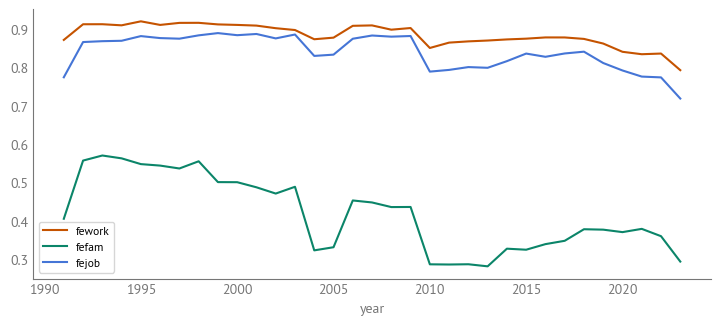

In [209]:
results_df.plot()